# **REGRESSÃO RIDGE, LASSO E ELASTIC NET**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carrega a base de dados
from google.colab import files
uploaded = files.upload()

Saving gasto_almoco.xlsx to gasto_almoco.xlsx


In [3]:
gasto = pd.read_excel('gasto_almoco.xlsx')

## **ANÁLISE INICIAL**

In [4]:
gasto.head(15)

,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
0,1,26,1,26
1,2,18,2,44
2,3,37,3,81
3,4,21,4,102
4,5,39,5,141
5,6,0,5,141
6,7,41,6,182
7,8,34,7,216
8,9,53,8,269
9,10,22,9,291


**Objetivo: Criação de um modelo de regressão para variáveis altamente correlacionadas (multicolinearidade)**

In [5]:
gasto.shape

(64, 4)

**Valores Missing**

In [6]:
gasto.isnull().sum()

dia                 0
gasto_dia_reais     0
num_refeicoes       0
gasto_acum_reais    0
dtype: int64

In [7]:
# Análise dos tipos de atributos.
gasto.dtypes

dia                 int64
gasto_dia_reais     int64
num_refeicoes       int64
gasto_acum_reais    int64
dtype: object

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [8]:
correlacoes = gasto.corr(method='spearman')
correlacoes

,dia,gasto_dia_reais,num_refeicoes,gasto_acum_reais
dia,1.000000,0.140909,0.999989,0.999989
gasto_dia_reais,0.140909,1.000000,0.142091,0.142091
num_refeicoes,0.999989,0.142091,1.000000,1.000000
gasto_acum_reais,0.999989,0.142091,1.000000,1.000000


Usando Fator de Inflação de Variância (VIF)

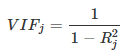

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [10]:
vif = add_constant(gasto) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const                 11.762488
dia                  836.171143
gasto_dia_reais        1.402142
num_refeicoes       2777.880784
gasto_acum_reais    3306.046633
dtype: float64

## MODELO RIDGE

In [11]:
gasto1 = gasto.drop(columns=['gasto_dia_reais'])

In [12]:
gasto1.head(8)

,dia,num_refeicoes,gasto_acum_reais
0,1,1,26
1,2,2,44
2,3,3,81
3,4,4,102
4,5,5,141
5,6,5,141
6,7,6,182
7,8,7,216


In [13]:
x = gasto1.iloc[ : , 0:2].values
y = gasto1.iloc[ : , 2].values

In [14]:
from sklearn.linear_model import Ridge

In [15]:
# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_ridge = Ridge(alpha = 0)
modelo_ridge.fit(x, y)
modelo_ridge.score(x,y)

0.9996807593215069

In [16]:
modelo_ridge.intercept_

2.6345750647848263

In [17]:
modelo_ridge.coef_

array([ 4.89145178, 25.63954273])

**Equação: gasto_acum = 2.6346 + 4.8915.dia + 25.6395.num_refeicoes**

In [18]:
previsao = modelo_ridge.predict(x)
previsao

array([  33.16556957,   63.69656407,   94.22755858,  124.75855308,
        155.28954758,  160.18099936,  190.71199387,  221.24298837,
        251.77398287,  282.30497738,  312.83597188,  343.36696638,
        373.89796089,  404.42895539,  460.59949262,  491.13048712,
        521.66148163,  552.19247613,  582.72347063,  613.25446514,
        643.78545964,  674.31645415,  704.84744865,  735.37844315,
        765.90943766,  796.44043216,  826.97142666,  857.50242117,
        888.03341567,  918.56441018,  949.09540468,  979.62639918,
       1010.15739369, 1040.68838819, 1071.21938269, 1101.7503772 ,
       1132.2813717 , 1162.81236621, 1193.34336071, 1223.87435521,
       1254.40534972, 1284.93634422, 1315.46733872, 1345.99833323,
       1376.52932773, 1407.06032223, 1437.59131674, 1468.12231124,
       1498.65330575, 1529.18430025, 1559.71529475, 1590.24628926,
       1620.77728376, 1651.30827826, 1681.83927277, 1712.37026727,
       1742.90126178, 1773.43225628, 1803.96325078, 1834.49424

In [19]:
gasto1['previsao'] = modelo_ridge.predict(x)

In [20]:
gasto1.head(15)

,dia,num_refeicoes,gasto_acum_reais,previsao
0,1,1,26,33.165570
1,2,2,44,63.696564
2,3,3,81,94.227559
3,4,4,102,124.758553
4,5,5,141,155.289548
5,6,5,141,160.180999
6,7,6,182,190.711994
7,8,7,216,221.242988
8,9,8,269,251.773983
9,10,9,291,282.304977


In [21]:
gasto1['erro_abs'] = abs (gasto1.gasto_acum_reais - gasto1.previsao)


In [22]:
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs
0,1,1,26,33.165570,7.165570
1,2,2,44,63.696564,19.696564
2,3,3,81,94.227559,13.227559
3,4,4,102,124.758553,22.758553
4,5,5,141,155.289548,14.289548


In [23]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401
std,18.618987,19.121109,581.353012,581.260209,5.393756
min,1.000000,1.000000,26.000000,33.165570,0.405350
25%,16.750000,16.750000,518.750000,514.028733,4.800202
50%,32.500000,32.500000,1006.000000,994.891896,8.420470
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439
max,64.000000,68.000000,2068.000000,2059.176394,22.758553


In [24]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao)

8.807401102211182

In [25]:
# Erro médio quadrático (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao)

106.20834811864499

## MODELO LASSO

In [26]:
x = gasto1.iloc[ : , 0:2].values
y = gasto1.iloc[ : , 2].values

In [27]:
from sklearn.linear_model import Lasso

In [28]:
# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_lasso = Lasso(alpha = 28)
modelo_lasso.fit(x, y)
modelo_lasso.score(x,y)

0.9996550235468806

In [29]:
modelo_lasso.intercept_

2.4884777044605926

In [30]:
modelo_lasso.coef_

array([ 8.09213073, 22.44796231])

**Equação: gasto_acum = 2.4885 + 8.0921.dia + 22.4480.num_refeicoes**

In [31]:
previsao2 = modelo_lasso.predict(x)
previsao2

array([  33.02857075,   63.5686638 ,   94.10875685,  124.6488499 ,
        155.18894294,  163.28107368,  193.82116673,  224.36125978,
        254.90135282,  285.44144587,  315.98153892,  346.52163197,
        377.06172502,  407.60181806,  460.58987343,  491.12996647,
        521.67005952,  552.21015257,  582.75024562,  613.29033867,
        643.83043171,  674.37052476,  704.91061781,  735.45071086,
        765.99080391,  796.53089695,  827.07099   ,  857.61108305,
        888.1511761 ,  918.69126915,  949.23136219,  979.77145524,
       1010.31154829, 1040.85164134, 1071.39173439, 1101.93182743,
       1132.47192048, 1163.01201353, 1193.55210658, 1224.09219963,
       1254.63229268, 1285.17238572, 1315.71247877, 1346.25257182,
       1376.79266487, 1407.33275792, 1437.87285096, 1468.41294401,
       1498.95303706, 1529.49313011, 1560.03322316, 1590.5733162 ,
       1621.11340925, 1651.6535023 , 1682.19359535, 1712.7336884 ,
       1743.27378144, 1773.81387449, 1804.35396754, 1834.89406

In [32]:
gasto1['previsao_lasso'] = modelo_lasso.predict(x)

In [33]:
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso
0,1,1,26,33.165570,7.165570,33.028571
1,2,2,44,63.696564,19.696564,63.568664
2,3,3,81,94.227559,13.227559,94.108757
3,4,4,102,124.758553,22.758553,124.648850
4,5,5,141,155.289548,14.289548,155.188943


In [34]:
gasto1['erro_abs_lasso'] = abs (gasto1.gasto_acum_reais - gasto1.previsao_lasso)


In [35]:
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso,erro_abs_lasso
0,1,1,26,33.165570,7.165570,33.028571,7.028571
1,2,2,44,63.696564,19.696564,63.568664,19.568664
2,3,3,81,94.227559,13.227559,94.108757,13.108757
3,4,4,102,124.758553,22.758553,124.648850,22.648850
4,5,5,141,155.289548,14.289548,155.188943,14.188943


In [36]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso,erro_abs_lasso
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401,996.093750,8.983458
std,18.618987,19.121109,581.353012,581.260209,5.393756,579.795335,5.882911
min,1.000000,1.000000,26.000000,33.165570,0.405350,33.028571,0.233904
25%,16.750000,16.750000,518.750000,514.028733,4.800202,514.035036,4.666379
50%,32.500000,32.500000,1006.000000,994.891896,8.420470,995.041502,7.907800
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439,1476.047967,12.408963
max,64.000000,68.000000,2068.000000,2059.176394,22.758553,2046.846282,22.648850


In [37]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

8.983457670916096

In [38]:
# Erro médio quadrático (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_lasso)

114.7703964250214

## MODELO ELASTIC NET

In [39]:
x = gasto1.iloc[ : , 0:2].values
y = gasto1.iloc[ : , 2].values

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
# Deve-se escolher o melhor parâmetro de regularização (alpha)
modelo_elastic = ElasticNet(alpha = 0.001, l1_ratio=0.85)
modelo_elastic.fit(x, y)
modelo_elastic.score(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.759e+03, tolerance: 2.129e+03
  model = cd_fast.enet_coordinate_descent(


0.9996471228261171

In [42]:
modelo_elastic.intercept_

-0.9110013969557258

In [43]:
modelo_elastic.coef_

array([ 9.12916736, 21.51686797])

**Equação: gasto_acum = -0.9111 + 9.1289.dia + 21.5172.num_refeicoes**

In [44]:
previsao3 = modelo_elastic.predict(x)
previsao3

array([  29.73503393,   60.38106926,   91.02710459,  121.67313992,
        152.31917525,  161.44834261,  192.09437794,  222.74041327,
        253.3864486 ,  284.03248393,  314.67851926,  345.32455459,
        375.97058992,  406.61662525,  458.77952855,  489.42556388,
        520.07159921,  550.71763454,  581.36366986,  612.00970519,
        642.65574052,  673.30177585,  703.94781118,  734.59384651,
        765.23988184,  795.88591717,  826.5319525 ,  857.17798783,
        887.82402316,  918.47005849,  949.11609382,  979.76212915,
       1010.40816448, 1041.05419981, 1071.70023514, 1102.34627047,
       1132.9923058 , 1163.63834113, 1194.28437646, 1224.93041179,
       1255.57644712, 1286.22248244, 1316.86851777, 1347.5145531 ,
       1378.16058843, 1408.80662376, 1439.45265909, 1470.09869442,
       1500.74472975, 1531.39076508, 1562.03680041, 1592.68283574,
       1623.32887107, 1653.9749064 , 1684.62094173, 1715.26697706,
       1745.91301239, 1776.55904772, 1807.20508305, 1837.85111

In [45]:
gasto1['previsao_elastic'] = modelo_elastic.predict(x)

In [46]:
gasto1.head()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso,erro_abs_lasso,previsao_elastic
0,1,1,26,33.165570,7.165570,33.028571,7.028571,29.735034
1,2,2,44,63.696564,19.696564,63.568664,19.568664,60.381069
2,3,3,81,94.227559,13.227559,94.108757,13.108757,91.027105
3,4,4,102,124.758553,22.758553,124.648850,22.648850,121.673140
4,5,5,141,155.289548,14.289548,155.188943,14.188943,152.319175


In [47]:
gasto1['erro_abs_elastic'] = abs (gasto1.gasto_acum_reais - gasto1.previsao_elastic)


In [48]:
gasto1.head(60)

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso,erro_abs_lasso,previsao_elastic,erro_abs_elastic
0,1,1,26,33.165570,7.165570,33.028571,7.028571,29.735034,3.735034
1,2,2,44,63.696564,19.696564,63.568664,19.568664,60.381069,16.381069
2,3,3,81,94.227559,13.227559,94.108757,13.108757,91.027105,10.027105
3,4,4,102,124.758553,22.758553,124.648850,22.648850,121.673140,19.673140
4,5,5,141,155.289548,14.289548,155.188943,14.188943,152.319175,11.319175
5,6,5,141,160.180999,19.180999,163.281074,22.281074,161.448343,20.448343
6,7,6,182,190.711994,8.711994,193.821167,11.821167,192.094378,10.094378
7,8,7,216,221.242988,5.242988,224.361260,8.361260,222.740413,6.740413
8,9,8,269,251.773983,17.226017,254.901353,14.098647,253.386449,15.613551
9,10,9,291,282.304977,8.695023,285.441446,5.558554,284.032484,6.967516


In [49]:
gasto1.describe()

,dia,num_refeicoes,gasto_acum_reais,previsao,erro_abs,previsao_lasso,erro_abs_lasso,previsao_elastic,erro_abs_elastic
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,32.546875,996.093750,996.093750,8.807401,996.093750,8.983458,996.093750,9.242030
std,18.618987,19.121109,581.353012,581.260209,5.393756,579.795335,5.882911,581.292345,5.700127
min,1.000000,1.000000,26.000000,33.165570,0.405350,33.028571,0.233904,29.735034,0.789339
25%,16.750000,16.750000,518.750000,514.028733,4.800202,514.035036,4.666379,512.410090,4.459433
50%,32.500000,32.500000,1006.000000,994.891896,8.420470,995.041502,7.907800,995.085147,7.907159
75%,48.250000,48.250000,1471.750000,1475.755060,12.139439,1476.047967,12.408963,1477.760203,13.064007
max,64.000000,68.000000,2068.000000,2059.176394,22.758553,2046.846282,22.648850,2046.502732,22.052189


In [50]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(gasto1.gasto_acum_reais, gasto1.previsao_elastic)

9.242030105747222

In [51]:
# Erro médio quadrático (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(gasto1.gasto_acum_reais, gasto1.previsao_elastic)

117.39889134362289